In [1]:

# 필요 라이브러리

# 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import os
from datetime import datetime

# 에러메세지 안나오게
import warnings
warnings.filterwarnings('ignore')

# pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [2]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
log = pd.read_csv('logs.txt',index_col=0)
log

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main
...,...,...,...,...,...,...,...
301856,CLOSE,View,XLSX,2ed068d5e6a72e80e4a997c01c59f782,OTHERAPP,2016.7.7,Main
301857,OPEN,NoView,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016.7.5,Main
301858,RESET,View,DOCX,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016.7.5,Main
301859,OPEN,NoView,PPT,9b5ee236571c2fcbe25132b6ba71d764,OTHERAPP,2016.7.14,Main


In [19]:
log.columns

Index(['actiontype', 'ismydoc', 'ext', 'sessionid', 'documentposition',
       'datetime', 'screen'],
      dtype='object')

In [5]:
# 데이터 정보 - 현재 결측치 없음.
log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   actiontype        301861 non-null  object
 1   ismydoc           301861 non-null  object
 2   ext               301861 non-null  object
 3   sessionid         301861 non-null  object
 4   documentposition  301861 non-null  object
 5   datetime          301861 non-null  object
 6   screen            301861 non-null  object
dtypes: object(7)
memory usage: 18.4+ MB


In [10]:
# 컬럼들의 유니크값
for i in log.columns:
    print(f'{i}의 유니크값 : ',log[i].nunique())
    print(log[i].unique())
    print('-----------------------------------------------------')

actiontype의 유니크값 :  8
['OPEN' 'CLOSE' 'RESET' 'SAVEAS' 'SAVE' 'SAVEAS_OTHER' 'EXPORT_SAME'
 'EXPORT']
-----------------------------------------------------
ismydoc의 유니크값 :  2
['NoView' 'View']
-----------------------------------------------------
ext의 유니크값 :  16
['PDF' 'HWP' 'XLSX' 'PPT' 'DOCX' 'ODT' 'DOC' 'XLS' 'PPTX' 'TXT' 'PPS'
 'PPSX' 'WORD' 'PNG' 'JPG' 'SHEET']
-----------------------------------------------------
sessionid의 유니크값 :  114994
['9400fd2e43d7dc2d054ca78806236ee1' 'f191063c562691041dfa935ff0876975'
 '3747719d8f6bdd334703320433928d5a' ... '2ed068d5e6a72e80e4a997c01c59f782'
 '41b8c1df291edd2aec30fc610e5b676e' '9b5ee236571c2fcbe25132b6ba71d764']
-----------------------------------------------------
documentposition의 유니크값 :  7
['LOCALSTORAGE' 'MYPOLARISDRIVE' 'OTHERAPP' 'NEWDOCUMENT' 'NONE'
 'OTHERCLOUD' 'SHAREDDOCUMENT']
-----------------------------------------------------
datetime의 유니크값 :  30
['2016.7.18' '2016.7.6' '2016.7.20' '2016.7.28' '2016.7.19' '2016.7.24'
 '2016.

* PDF: Adobe Portable Document Format
* HWP: 한글 워드 프로세서 문서
* XLSX: Microsoft Excel 파일
* PPT: Microsoft PowerPoint 프레젠테이션 파일
* DOCX: Microsoft Word 문서 파일
* ODT: OpenDocument 텍스트 문서
* DOC: Microsoft Word 문서 파일 (구 버전)
* XLS: Microsoft Excel 파일 (구 버전)
* PPTX: Microsoft PowerPoint 프레젠테이션 파일 (구 버전)
* TXT: 텍스트 파일
* PPS: Microsoft PowerPoint 슬라이드 쇼 파일
* PPSX: Microsoft PowerPoint 슬라이드 쇼 파일 (구 버전)
* WORD: Microsoft Word 문서 파일 (일반적인 약어)
* PNG: 포터블 네트워크 그래픽 파일 (이미지)
* JPG: Joint Photographic Experts Group 파일 (이미지)
* SHEET: 스프레드시트 파일 (일반적인 약어)

In [4]:
# 구버전 사용율이 높은지 확인해보기 위해 구버전 유무에 대한 컬럼 생성
log['version_old'] = log['ext'].apply(lambda x: '사용' if x in ('DOC','XLS','PPTX','PPSX') else '미사용')

In [5]:
# session_id는 정수값으로 대체.
mapping = {}

# 주어진 문자열을 순회하면서 번호 매김
for item in log['sessionid']:
    if item in mapping:  # 이미 매핑된 문자인 경우
        pass
    else:  # 처음 나타나는 문자인 경우 새 번호를 부여
        new_number = len(mapping) + 1
        mapping[item] = new_number
    

log['sessionid'] = log['sessionid'].apply(lambda x : mapping[x])

In [6]:
# datetime은 데이터타입 변환
log.datetime = pd.to_datetime(log.datetime)

In [7]:
# 요일 컬럼 생성
log['week'] = log['datetime'].dt.day_name()

Text(0, 0.5, '건수')

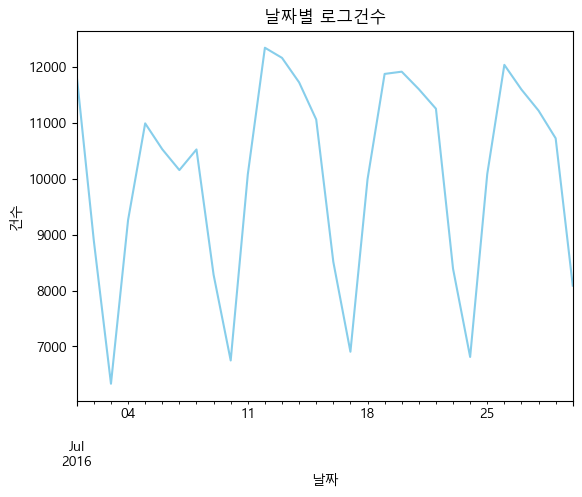

In [87]:
# 날짜별 로그수
log.groupby('datetime').size().plot(color='skyblue')
plt.title('날짜별 로그건수')
plt.xlabel('날짜')
plt.ylabel('건수')

<Axes: xlabel='datetime'>

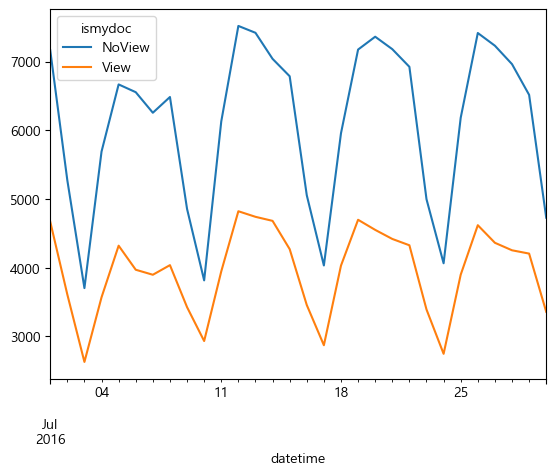

In [165]:
log.groupby(['datetime','ismydoc']).size().unstack().plot()

Text(0, 0.5, '건수')

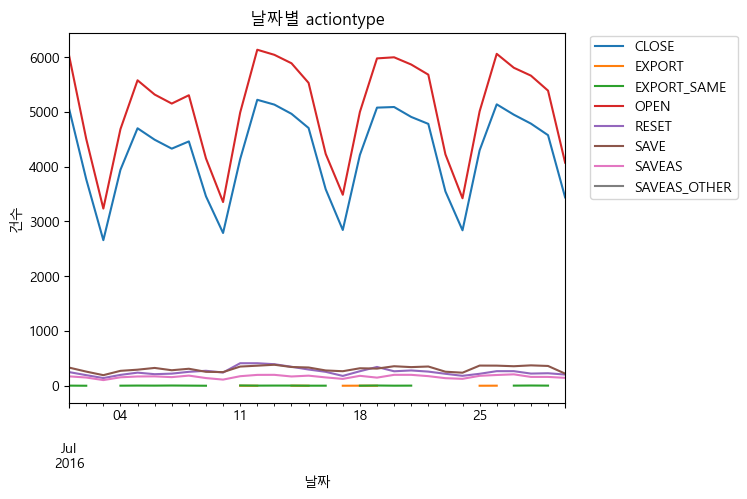

In [16]:
log.groupby(['datetime','actiontype']).size().unstack().plot()
plt.legend(loc=[1.05,0.55])
plt.title('날짜별 actiontype')
plt.xlabel('날짜')
plt.ylabel('건수')

<Axes: xlabel='datetime'>

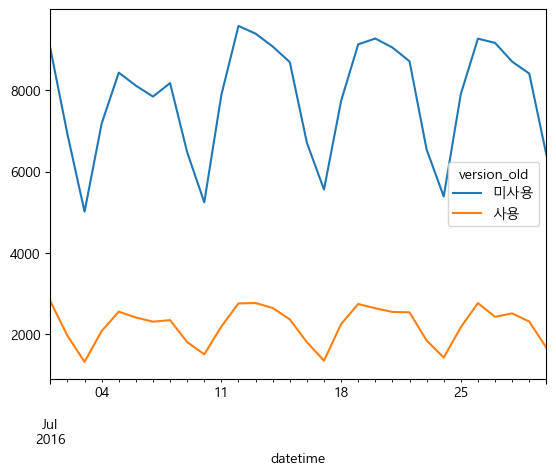

In [163]:
log.groupby(['datetime','version_old']).size().unstack().plot()

Text(0, 0.5, '건수')

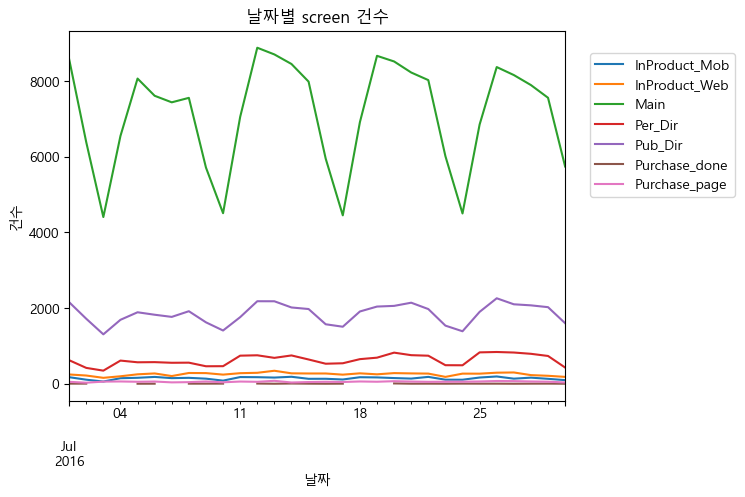

In [17]:
log.groupby(['datetime','screen']).size().unstack().plot()
plt.legend(loc=[1.05,0.55])
plt.title('날짜별 screen 건수')
plt.xlabel('날짜')
plt.ylabel('건수')

In [51]:
log.groupby('ext')['sessionid'].nunique().sort_values()/log.groupby('ext')['sessionid'].nunique().sort_values().sum()

ext
WORD     0.000007
PNG      0.000015
SHEET    0.000022
JPG      0.000067
PPS      0.001131
ODT      0.002771
PPSX     0.008957
PPT      0.019185
TXT      0.033766
PPTX     0.052123
DOC      0.082578
XLS      0.082829
HWP      0.083258
XLSX     0.173285
DOCX     0.183586
PDF      0.276422
Name: sessionid, dtype: float64

Text(0, 0.5, '건수')

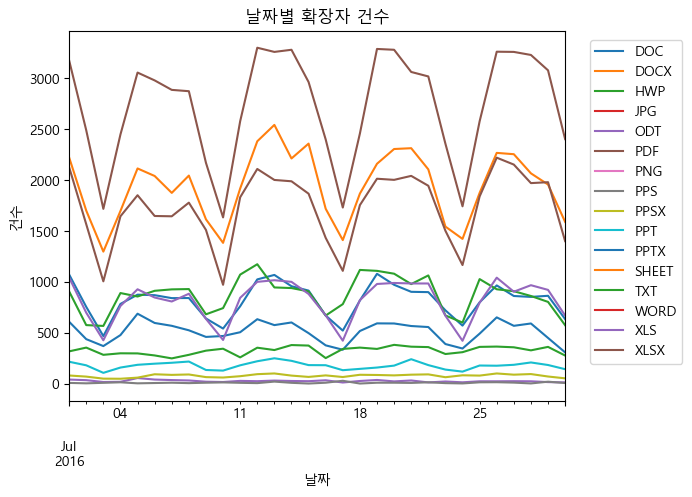

In [20]:
log.groupby(['datetime','ext']).size().unstack().plot()
plt.legend(loc=[1.05,0.1])
plt.title('날짜별 확장자 건수')
plt.xlabel('날짜')
plt.ylabel('건수')

Text(0, 0.5, '건수')

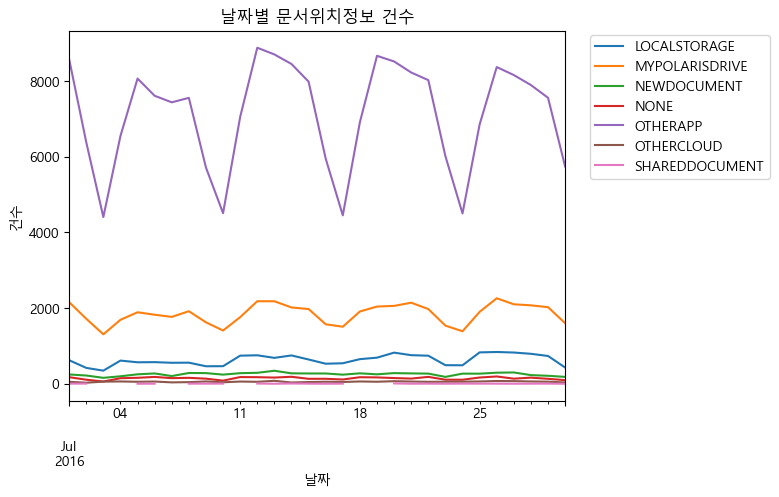

In [23]:
log.groupby(['datetime','documentposition']).size().unstack().plot()
plt.legend(loc=[1.05,0.6])
plt.title('날짜별 문서위치정보 건수')
plt.xlabel('날짜')
plt.ylabel('건수')

In [77]:
a= log.groupby('sessionid').agg({'week':'first'}).reset_index().groupby('week').size()
b=round(a/a.sum()*100)
b

week
Friday       18.0
Monday       13.0
Saturday     14.0
Sunday        9.0
Thursday     15.0
Tuesday      16.0
Wednesday    15.0
dtype: float64

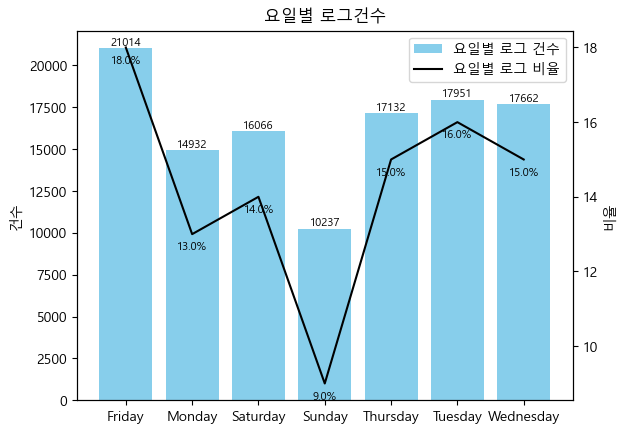

In [72]:
# 요일별 로그건수
fig, ax1 = plt.subplots()
ax1.bar(a.index, a, color='skyblue', label='요일별 로그 건수')
ax1.set_ylabel('건수')

ax2 = ax1.twinx()
ax2.plot(b.index, b, color='black', label='요일별 로그 비율')
ax2.set_ylabel('비율')

plt.title('요일별 로그건수')
plt.xlabel('요일')
plt.xticks(rotation=45, ha='right')  # x축 라벨 45도 회전, 오른쪽 정렬

# 그래프 위에 글씨 추가
for i, v in enumerate(a):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=8)
for i, v in enumerate(b):
    ax2.text(i, v-0.5, f'{v}%', ha='center', va='bottom', fontsize=8)

# 범례 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

Text(0, 0.5, 'actiontype')

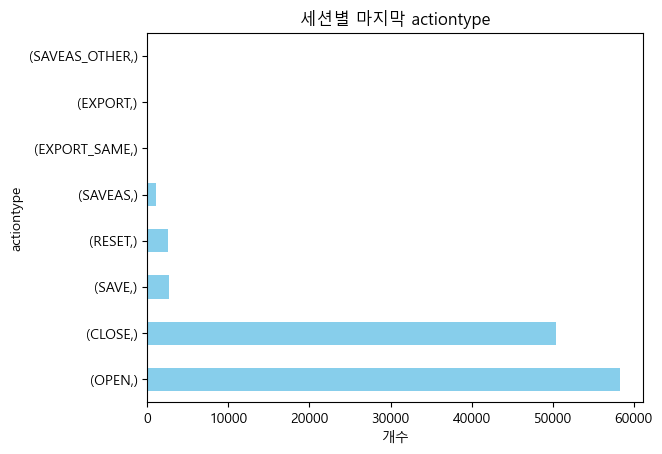

In [89]:
log.groupby('sessionid').agg({'actiontype':'last'}).value_counts().plot(kind='barh',color='skyblue')
plt.title('세션별 마지막 actiontype')
plt.xlabel('개수')
plt.ylabel('actiontype')

Text(0, 0.5, 'actiontype')

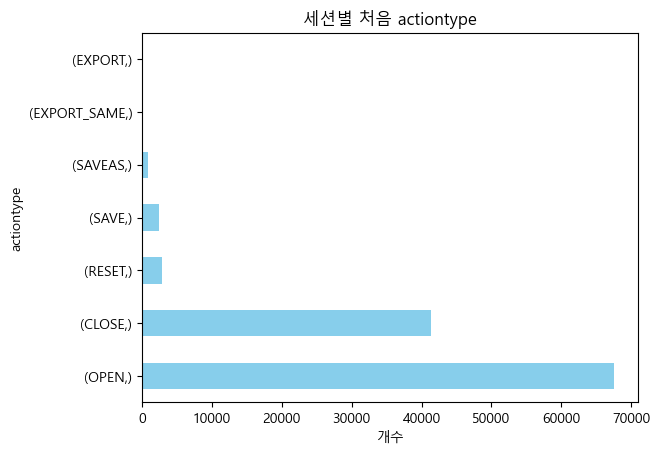

In [96]:
log.groupby('sessionid').agg({'actiontype':'first'}).value_counts().plot(kind='barh',color='skyblue')
plt.title('세션별 처음 actiontype')
plt.xlabel('개수')
plt.ylabel('actiontype')

Text(0, 0.5, '')

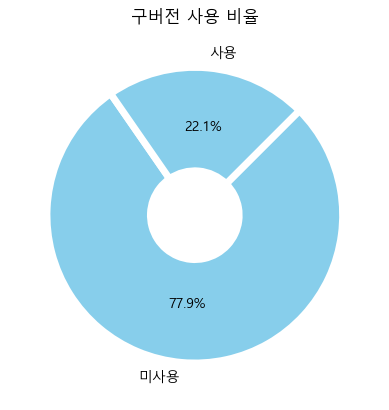

In [118]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors=['skyblue']

log.version_old.value_counts(normalize=True).plot.pie(textprops={'size':10},colors=colors,wedgeprops=wedgeprops,autopct='%.1f%%',counterclock=False,startangle=45)
plt.title('구버전 사용 비율')
plt.xlabel('')
plt.ylabel('')

In [24]:
log

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,version_old,week
0,OPEN,NoView,PDF,1,LOCALSTORAGE,2016-07-18,Per_Dir,미사용,Monday
1,CLOSE,NoView,PDF,1,LOCALSTORAGE,2016-07-18,Per_Dir,미사용,Monday
2,OPEN,View,PDF,1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,미사용,Monday
3,CLOSE,View,PDF,1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,미사용,Monday
4,OPEN,NoView,PDF,2,OTHERAPP,2016-07-06,Main,미사용,Wednesday
...,...,...,...,...,...,...,...,...,...
301856,CLOSE,View,XLSX,114992,OTHERAPP,2016-07-07,Main,미사용,Thursday
301857,OPEN,NoView,DOCX,114993,OTHERAPP,2016-07-05,Main,미사용,Tuesday
301858,RESET,View,DOCX,114993,OTHERAPP,2016-07-05,Main,미사용,Tuesday
301859,OPEN,NoView,PPT,114994,OTHERAPP,2016-07-14,Main,미사용,Thursday


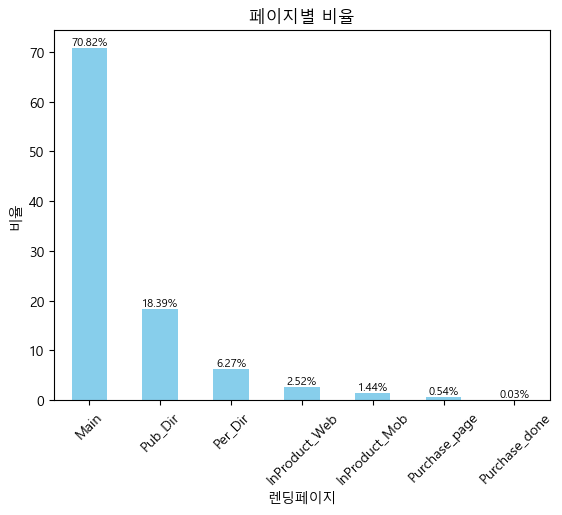

In [30]:
a=round(log.screen.value_counts(normalize=True)*100,2)
a.plot.bar(color='skyblue')
plt.title('페이지별 비율')
plt.xlabel('렌딩페이지')
plt.ylabel('비율')
plt.xticks(rotation=45);

for i, v in enumerate(a):
    plt.text(i, v, f"{v}%", ha='center', va='bottom', fontsize=8)

In [41]:
round(log.documentposition.value_counts(normalize=True)*100)

documentposition
OTHERAPP          71.0
MYPOLARISDRIVE    18.0
LOCALSTORAGE       6.0
NEWDOCUMENT        3.0
NONE               1.0
OTHERCLOUD         1.0
SHAREDDOCUMENT     0.0
Name: proportion, dtype: float64

Text(0, 0.5, '문서위치')

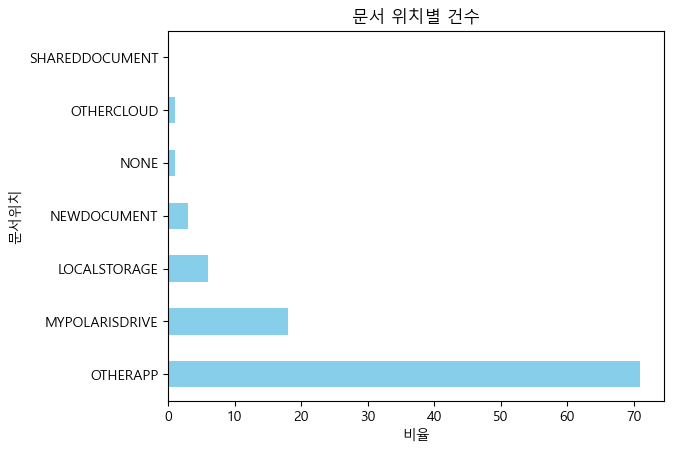

In [145]:
round(log.documentposition.value_counts(normalize=True)*100).plot(kind='barh',color='skyblue')
plt.title('문서 위치별 건수')
plt.xlabel('비율')
plt.ylabel('문서위치')

In [322]:
log.purchase_flag.value_counts()

purchase_flag
0    301861
Name: count, dtype: int64

Text(221.72222222222223, 0.5, '날짜')

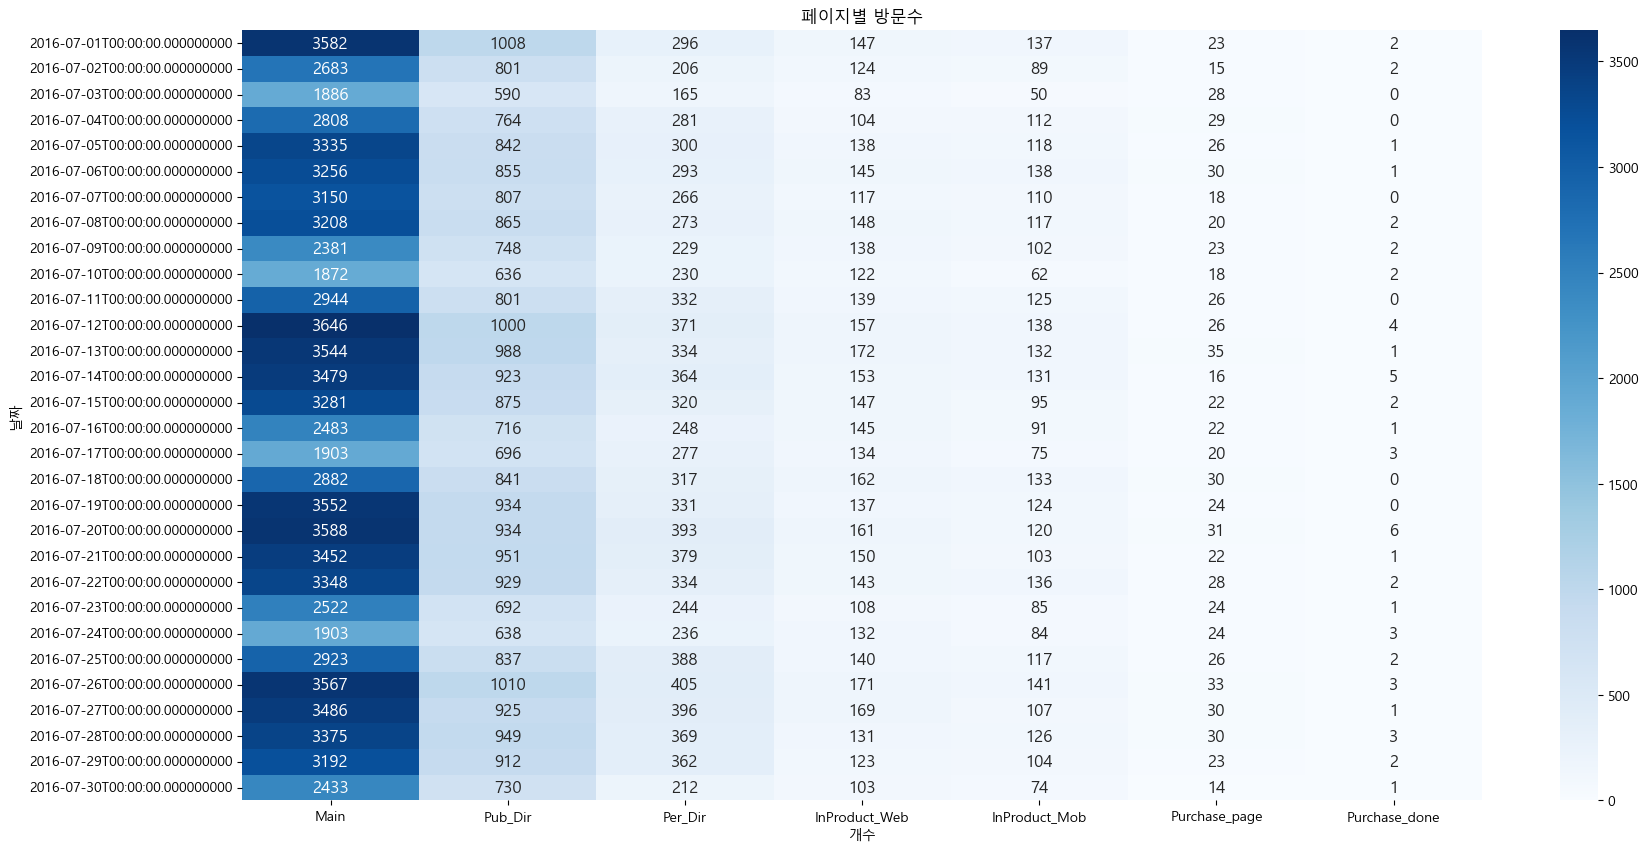

In [31]:
# 이탈률
plt.subplots(figsize=(20,10))
funnel = log.groupby(['datetime','screen'])['sessionid'].nunique().unstack().fillna(0).astype(int)
sns.heatmap(funnel[funnel.mean().sort_values(ascending=False).index], annot=True, fmt='d',cmap='Blues',annot_kws={'size':12})
plt.title('페이지별 방문수')
plt.xlabel('개수')
plt.ylabel('날짜')

In [42]:
funnel = log.groupby(['datetime','screen'])['sessionid'].nunique().unstack().fillna(0).astype(int)
funnel = funnel.mean()
funnel = funnel[funnel.sort_values(ascending=False).index].reset_index()
funnel

,screen,0
0,Main,2988.800000
1,Pub_Dir,839.900000
2,Per_Dir,305.033333
3,InProduct_Web,138.100000
4,InProduct_Mob,109.200000
5,Purchase_page,24.533333
6,Purchase_done,1.766667


Text(51.72222222222221, 0.5, '페이지')

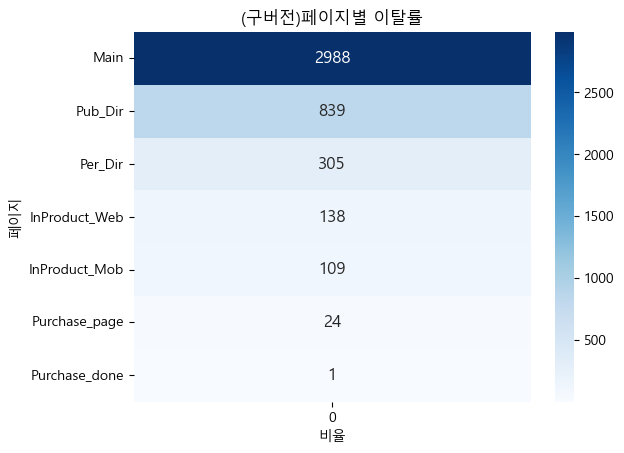

In [45]:

sns.heatmap(funnel.set_index('screen').astype(int),annot=True, fmt='d',cmap='Blues',annot_kws={'size':12})
plt.title('(구버전)페이지별 이탈률')
plt.xlabel('비율')
plt.ylabel('페이지')

In [38]:
s=[]
for i,j in enumerate(funnel.screen):
    if i<6:
        s.append(funnel['screen'][i]+'>'+funnel['screen'][i+1])

print(s)

['Main>Pub_Dir', 'Pub_Dir>Per_Dir', 'Per_Dir>InProduct_Mob', 'InProduct_Mob>InProduct_Web', 'InProduct_Web>Purchase_page', 'Purchase_page>Purchase_done']


In [39]:

funnel['pre'] = funnel[0].shift(1)
funnel
funnel['diff'] = (funnel['pre'] - funnel[0]).shift(-1)
funnel['ratio'] = round(funnel['diff']/funnel[0]*100)
funnel_tmp = funnel[['screen','ratio']].set_index('screen').fillna(0).astype(int)
list(funnel_tmp['ratio'][:-1])
# sns.heatmap(funnel_tmp,annot=True, fmt='d',cmap='Blues',annot_kws={'size':12})
# plt.title('페이지별 이탈률')
# plt.xlabel('비율')
# plt.ylabel('페이지')

[73, 68, 64, 20, 81, 95]

Text(51.7222222222222, 0.5, '페이지')

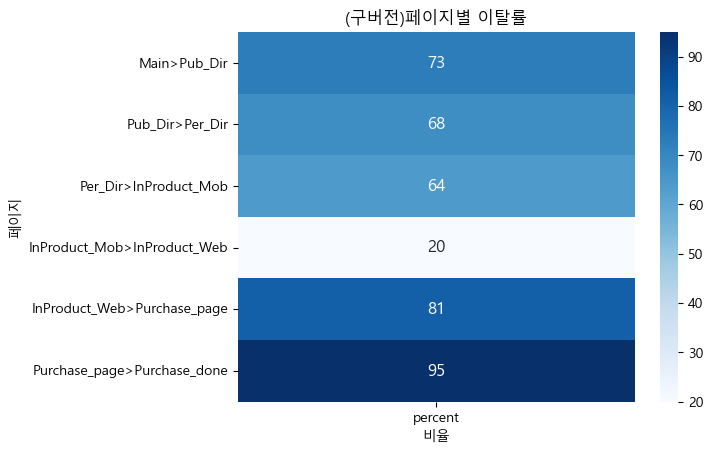

In [40]:
s2 = pd.Series(list(funnel_tmp['ratio'][:-1]),index=s)
s3 = pd.DataFrame(s2,columns=['percent'])
sns.heatmap(s3,annot=True, fmt='d',cmap='Blues',annot_kws={'size':12})
plt.title('(구버전)페이지별 이탈률')
plt.xlabel('비율')
plt.ylabel('페이지')


In [389]:
# 유저의 재방문율
a=log.groupby('sessionid').agg({'datetime':['first','last']}).reset_index()
(a[a[('datetime','first')]!=a[('datetime','last')]][('sessionid','')].nunique()/log.groupby('datetime')['sessionid'].nunique().sum())

0.008116127029031757

In [352]:
log.groupby('datetime')['sessionid'].nunique().sum()

115942